<a href="https://colab.research.google.com/github/JulioFMDB/cursopython/blob/main/Pandas_DataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://user-images.githubusercontent.com/7065401/75165824-badf4680-5701-11ea-9c5b-5475b0a33abf.png"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Pandas - `DataFrame`s

Provavelmente, a estrutura de dados mais importante dos pandas é a `DataFrame`. É uma estrutura tabular fortemente integrada com `Series`.



---
## Hands on! 

In [ ]:
import numpy as np
import pandas as pd

Vamos manter a nossa análise dos países do G7 e olhar agora para `DataFrames`. Como dito, um DataFrame se parece muito com uma tabela (como aquela que você pode apreciar [aqui](https://docs.google.com/spreadsheets/d/1kx_EzgdFfLy47_ZH6hNFCdFmZeAf0r8r3QO0k9phA4E/edit?usp=sharing)):

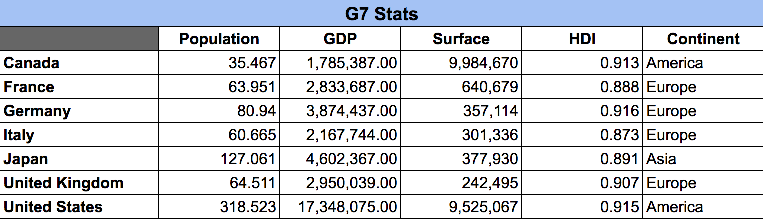

Criar DataFrames manualmente pode ser entediante. 99% do tempo você estará puxando os dados de uma base de dados, de um arquivo csv ou da web. Mas mesmo assim, você pode criar um DataFrame especificando as colunas e os valores:

In [ ]:
df = pd.DataFrame({
    'Population': [35.467, 63.951, 80.94 , 60.665, 127.061, 64.511, 318.523],
    'GDP': [
        1785387,
        2833687,
        3874437,
        2167744,
        4602367,
        2950039,
        17348075
    ],
    'Surface Area': [
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ],
    'HDI': [
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ],
    'Continent': [
        'America',
        'Europe',
        'Europe',
        'Europe',
        'Asia',
        'Europe',
        'America'
    ]
}, columns=['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'])

_(O atributo de `columns` é opcional. Estou usando-o para manter a mesma ordem que na figura acima)_

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,80.940,3874437,357114,0.916,Europe
3,60.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


Os `DataFrame`s também têm índices. Como você pode ver na "tabela" acima, o Pandas atribuiu um índice numérico e auto-incremental automaticamente a cada "linha" em nossa DataFrame. No nosso caso, sabemos que cada linha representa um país, por isso vamos apenas reatribuir o índice:


In [ ]:
df.index = [
    'Canada'
    ,'France'
    ,'Germany'
    ,'Italy'
    ,'Japan'
    ,'United Kingdom'
    ,'United States'
]

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.columns

Index(['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'], dtype='object')

In [ ]:
df.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Canada to United States
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    7 non-null      float64
 1   GDP           7 non-null      int64  
 2   Surface Area  7 non-null      int64  
 3   HDI           7 non-null      float64
 4   Continent     7 non-null      object 
dtypes: float64(2), int64(2), object(1)
memory usage: 636.0+ bytes


In [ ]:
df.size

35

In [ ]:
linhas = df.shape[0]
colunas = df.shape[1]
print('O df tem {0} linhas e {1} colunas'.format(linhas, colunas))

O df tem 7 linhas e 5 colunas


In [ ]:
df.describe()

,Population,GDP,Surface Area,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


In [ ]:
df.dtypes

Population      float64
GDP               int64
Surface Area      int64
HDI             float64
Continent        object
dtype: object

In [ ]:
df.dtypes.value_counts()

float64    2
int64      2
object     1
dtype: int64

---
## Indexação, Seleção e Slicing

As colunas individuais no DataFrame podem ser selecionadas com indexação regular. Cada coluna é representada como uma `Series`:

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.GDP.Italy

2167744

In [ ]:
df['Surface Area']

Canada            9984670
France             640679
Germany            357114
Italy              301336
Japan              377930
United Kingdom     242495
United States     9525067
Name: Surface Area, dtype: int64

In [ ]:
df.loc['Japan']

Population      127.061
GDP             4602367
Surface Area     377930
HDI               0.891
Continent          Asia
Name: Japan, dtype: object

In [ ]:
df.iloc[3]

Population       60.665
GDP             2167744
Surface Area     301336
HDI               0.873
Continent        Europe
Name: Italy, dtype: object

Note que o `index` da série retornada é o mesmo que o DataFrame. E o seu `name` é o nome da coluna. Se você estiver trabalhando em um notebook e quiser ver um formato mais parecido com o DataFrame, você pode usar o método `to_frame`:

In [ ]:
pd.DataFrame(df['Population'])

,Population
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [ ]:
df['Population'].to_frame()

,Population
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


Múltiplas colunas podem ser selecionadas da mesma maneira que é feito em `NumPy` e `Séries`:

In [ ]:
df[['GDP', 'Population']]

,GDP,Population
Canada,1785387,35.467
France,2833687,63.951
Germany,3874437,80.940
Italy,2167744,60.665
Japan,4602367,127.061
United Kingdom,2950039,64.511
United States,17348075,318.523


Neste caso, o resultado é outro `DataFrame`. Slicing funciona de modo diferente, atuando ao nível de "row lever", e pode ser contra intuitivo:

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


A nível de linha a seleção funciona melhor com `loc` e `iloc` **o qual é fortemente recomendado** ao invés da fatiamento direto (_direct slicing_) (`df[:]`).

`loc` Seleciona linhsa que correspondem ao índice solicitado:

In [ ]:
df.loc['Italy']

Population       60.665
GDP             2167744
Surface Area     301336
HDI               0.873
Continent        Europe
Name: Italy, dtype: object

In [ ]:
condicao = (df.index == 'Italy') | (df.index == 'Canada')
df.loc[condicao]

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
Italy,60.665,2167744,301336,0.873,Europe


In [ ]:
df.loc['France':'Italy']

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe


Um segundo `argumento` e muito útil, é você passar a coluna ou colunas (por meio de listas), que você deseja selecionar:

In [ ]:
df.loc['France':'Italy',['Population', 'GDP']]

,Population,GDP
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744


In [ ]:
#by Julio, co-owners: Will's
condicao = (df.index == 'Italy') | (df.index == 'Canada')
condicao2 = (df.columns == 'Continent')
df.loc[condicao,condicao2]

,Continent
Canada,America
Italy,Europe


`iloc` funciona com "posição númerica" do índice:

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.iloc[0]

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [ ]:
df.iloc[-2]

Population       64.511
GDP             2950039
Surface Area     242495
HDI               0.907
Continent        Europe
Name: United Kingdom, dtype: object

In [ ]:
df.iloc[[0, 1, -1, 3]]

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
United States,318.523,17348075,9525067,0.915,America
Italy,60.665,2167744,301336,0.873,Europe


In [ ]:
df.iloc[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


In [ ]:
df.iloc[1:3, 3]

France     0.888
Germany    0.916
Name: HDI, dtype: float64

In [ ]:
df.iloc[1:3, [1,3]]

,GDP,HDI
France,2833687,0.888
Germany,3874437,0.916


In [ ]:
df.iloc[1:3, 1:4]

,GDP,Surface Area,HDI
France,2833687,640679,0.888
Germany,3874437,357114,0.916


> **RECOMENDAÇÃO: Sempre utilise `loc` and `iloc` para reduzir ambiguidades, especialmente com `DataFrames`s com índice numérico.**

---
## Seleção Condicional (boolean arrays)

Vimos a selecção condicional aplicada a Séries e funcionará da mesma forma para `DataFrame`s. Afinal, um `DataFrame` é uma coleção de `Series`:

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
condicao = df['Population'] > 70

In [ ]:
df[condicao]

,Population,GDP,Surface Area,HDI,Continent
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United States,318.523,17348075,9525067,0.915,America


A correspondência booleana é feita ao nível do índice, para que você possa filtrar por qualquer linha, desde que contenha os índices certos. A seleção de colunas ainda funciona como esperado, inclusive usando condições booleanas:

In [ ]:
df.loc[condicao, ['GDP','HDI']]

,GDP,HDI
Germany,3874437,0.916
Japan,4602367,0.891
United States,17348075,0.915


In [ ]:
#by Julio, co-owners: Will's alemoa's team!
condicao = (df.index == 'Italy') | (df.index == 'Canada')
condicao2 = (df.columns == 'Continent')
df.loc[condicao,condicao2]

,Continent
Canada,America
Italy,Europe


---

## Dropando coisas - Dropping stuff

Ao contrário do conceito de seleção, nós temos "queda" (`drop`). Em vez de apontar quais valores você gostaria de selecionar (_`select`_), você poderia apontar quais você gostaria de deixar cair (`dropar`):

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.drop('Canada')

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
cond = (df.index == 'Germany') | (df.index == 'Italy')
df.drop(cond)

KeyError: ignored

In [ ]:
df.drop(['Canada', 'Italy'])

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.drop(columns=['HDI', 'GDP'])

,Population,Surface Area,Continent
Canada,35.467,9984670,America
France,63.951,640679,Europe
Germany,80.940,357114,Europe
Italy,60.665,301336,Europe
Japan,127.061,377930,Asia
United Kingdom,64.511,242495,Europe
United States,318.523,9525067,America


In [ ]:
df.drop(['Italy', 'Canada'])

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.drop(['Italy', 'Canada'], axis=0)

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.drop(['HDI'], axis=1)

,Population,GDP,Surface Area,Continent
Canada,35.467,1785387,9984670,America
France,63.951,2833687,640679,Europe
Germany,80.940,3874437,357114,Europe
Italy,60.665,2167744,301336,Europe
Japan,127.061,4602367,377930,Asia
United Kingdom,64.511,2950039,242495,Europe
United States,318.523,17348075,9525067,America


In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.drop(['HDI'], axis=1, inplace=True)

In [ ]:
df

,Population,GDP,Surface Area,Continent
Canada,35.467,1785387,9984670,America
France,63.951,2833687,640679,Europe
Germany,80.940,3874437,357114,Europe
Italy,60.665,2167744,301336,Europe
Japan,127.061,4602367,377930,Asia
United Kingdom,64.511,2950039,242495,Europe
United States,318.523,17348075,9525067,America


In [ ]:
df = pd.DataFrame({
    'Population': [35.467, 63.951, 80.94 , 60.665, 127.061, 64.511, 318.523],
    'GDP': [
        1785387,
        2833687,
        3874437,
        2167744,
        4602367,
        2950039,
        17348075
    ],
    'Surface Area': [
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ],
    'HDI': [
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ],
    'Continent': [
        'America',
        'Europe',
        'Europe',
        'Europe',
        'Asia',
        'Europe',
        'America'
    ]
}, columns=['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'])

Todos estes métodos `drop` devolvem um **novo DataFrame**. Se você preferir modificá-lo "in place", você pode usar o atributo `inplace`. Veremos logo mais.

---

## Operações

**Operações com séries** funciona a nível de coluna, propagando para linhas abaixo (o que pode ser contra intuitivo).

---

## Modificando DataFrames

É simples e intuitivo. Você pode adicionar colunas, ou substituir valores para colunas sem problemas:

### Adding a new column

---
### Substituindo valores por coluna

---
### Renaming Columns


---
### Dropando Colunas

---
### Adicionando Valores

**CUIDADO**: `append` retorna um novo `DataFrame`:

Você pode definir diretamente o novo índice e os valores para o `DataFrame`:

Você pode usar o `drop` para apenas remover a linha por índice:

---
### Uma mudança de índice um pouco mais radical

---

## Criando colunas a partir de outras colunas

Alterar um DataFrame geralmente involve uma combinação de diferentes colunas umas com as outras. Por exemplo, na nossa análise por país, nós poderíamos tentar calucar o "GPD per capita", que é dada pela fórmula `GPD`/`Population`.

Como esperado, o Pandas resolve esta operação dividindo as séries envolvidas:

E o resultado desta operação, também, conforme esperado é outra série que você pode adicionar ao `DataFrame` original:

---

## Informações Estatísticas

Você já deve ter visto o método `describe`, o qual retorna a você uma boa "sumarização" do `DataFrame`. Vamos explorar outros métodos com um pouco mais de detalhes: